
<h3>1. Выбор и описание данных</h3>
<p>Для выполнения лабораторной работы мною был выбран датасет "Student Alcohol Consumption"(<a target="_blank">https://www.kaggle.com/datasets/uciml/student-alcohol-consumption</a>). Несмотря на название "Потребление алкоголя учащимися", этот датасет представляет собой набор практически всех поддающихся измерению характеристик учеников школы, среди которых лишь два показателя относится к употреблению алкоголя. В действительности исследуется зависимость оценок по математике от значений всевозможных универсальных бытовых показателей для каждого ученика. Среди показателей возраст, пол, тип местности, в которой проживает ученик(бинарный показатель город/сельская местность), наличие интернета дома у ученика, состоит ли ученик в отношениях. Кроме того, значительным преимуществом этого набора данных является то, что он требует исключительно common knowledge для анализа и не содержит никаких специфических показателей из сфер психологии или педагогики. Также в датасете наличиствует количественный показатель "final grade", отображающий оценку каждого ученика по математике за финальный тест (в интервале от 0 до 20).</p>
<p>Данные взяты из опросе, проведенном среди учеников двух португальских школ в рамках исследования "P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7"</p>
<p>Также мною было принято решение несколько видоизменить данные в датафреме для улучшения качества восприятия информации. В датафрейме присутствует оценка учащихся по математике за первый семестр, второй семестр и за год, мною было принято решение оставить только оценку за год, так как мы не знаем, в какой момент ученики проходили опрос, при условии, что они проходили опрос в начале учебного года, более репрезентативными являются оценки за первый семестр, в противном случае, если ученики проходили опрос, информация из которого представлена в датасете, после завершения экзамена, что более вероятно, так как в датасете отсутствуют ученики, у которых была бы оценка за первый семестре и не было бы оценки за второй семестр, то более репрезентативными являются оценки за второй семестр и за год.</p>

In [25]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import random

df = pd.read_csv("student-mat.csv")
df = df.drop(columns=['G1', 'G2'])

<h3>2. Описание показателей</h3>
<p>Ниже мы производим итерацию по всем столбцам дата-фрейма. Для количественных столбцов выводятся диапазон значений и среднее значение, а для качественных выводятся возможные значения с количеством значений в дата-фрейме, соответственно первое значение в списке возможных значений является модой данного показателя.</p>

In [26]:
continuous_columns = ['age', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
discrete_columns = [column for column in df.columns if column not in continuous_columns]
for column in df:
    column_series = df[column]
    print('---------------------')
    print(f'Название: {column}')
    if column in continuous_columns:
        print(f'Диапазон: {column_series.min()}-{column_series.max()}')
        print(f'Среднее значение: {column_series.mean()}')
    else:
        possible_values = '\n'+'\n'.join(str(column_series.value_counts()).split("\n")[1:-1])
        print(f'Возможные значения: {possible_values}')
    #print(df[column])

---------------------
Название: school
Возможные значения: 
GP    349
MS     46
---------------------
Название: sex
Возможные значения: 
F    208
M    187
---------------------
Название: age
Диапазон: 15-22
Среднее значение: 16.696202531645568
---------------------
Название: address
Возможные значения: 
U    307
R     88
---------------------
Название: famsize
Возможные значения: 
GT3    281
LE3    114
---------------------
Название: Pstatus
Возможные значения: 
T    354
A     41
---------------------
Название: Medu
Возможные значения: 
4    131
2    103
3     99
1     59
0      3
---------------------
Название: Fedu
Возможные значения: 
2    115
3    100
4     96
1     82
0      2
---------------------
Название: Mjob
Возможные значения: 
other       141
services    103
at_home      59
teacher      58
health       34
---------------------
Название: Fjob
Возможные значения: 
other       217
services    111
teacher      29
at_home      20
health       18
---------------------
Название: r

<h3>3. Визуализация для отдельных показателей</h3>

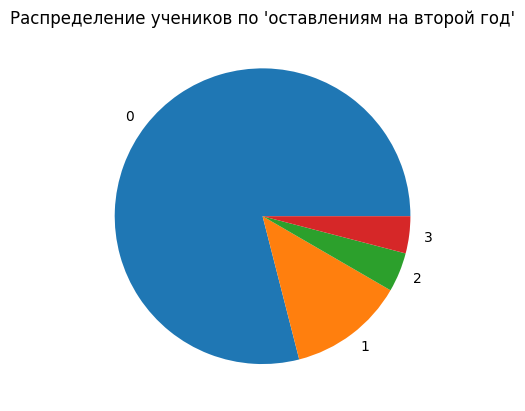

In [27]:
failures_distribution_plot = df["failures"].value_counts().plot(kind='pie', title="Распределение учеников по 'оставлениям на второй год'", xlabel='', ylabel='')

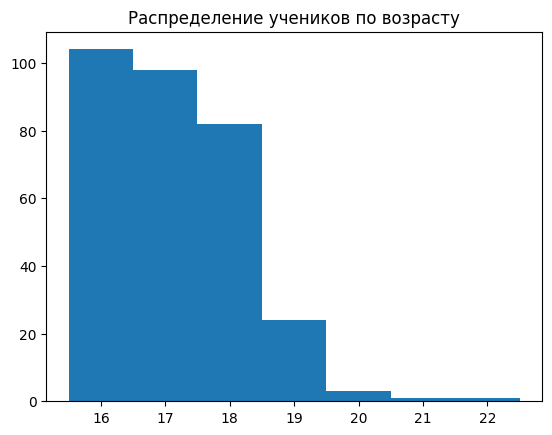

In [28]:
failures_distribution_plot = df["age"].plot(kind='hist', use_index='age', 
                                                                title="Распределение учеников по возрасту",
                                                                bins=np.arange(15.5, 23),
                                                                xlabel='', 
                                                                ylabel='')

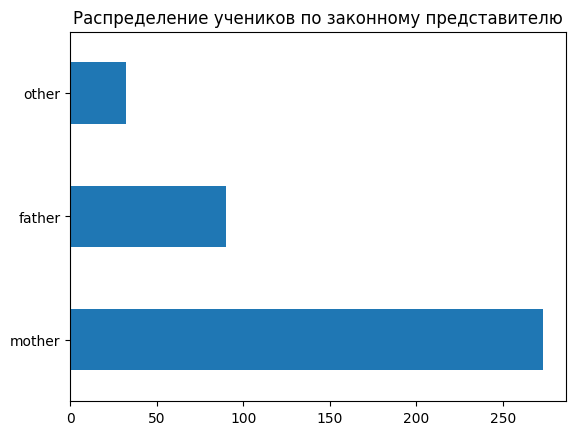

In [29]:
failures_distribution_plot = df["guardian"].value_counts().plot(kind='barh', 
                                                                title="Распределение учеников по законному представителю",
                                                                xlabel='', 
                                                                ylabel='')

<h3>4. Группировка объектов</h3>
<h3>Сформируем группы по качественному показателю address, который отражает территориальную принадлежность домашнего адреса ученика. Значения показателя могут быть следующими: U(urban) - городская местность и R(rural) - сельская местность.</h3>

In [30]:
groups_by_address_for_means = df[['address', 'G3']].groupby(['address'])
rural_mean_value = groups_by_address_for_means.mean().loc['R'].item()
urban_mean_value = groups_by_address_for_means.mean().loc['U'].item()
display(Markdown(f'<h3>Как мы видим у учеников, проживающих в городской местности, средний балл за экзамен по математике выше на {urban_mean_value - rural_mean_value}</h3>'))

<h3>Как мы видим у учеников, проживающих в городской местности, средний балл за экзамен по математике выше на 1.1629034646135619</h3>

In [31]:
groups_by_address = df[continuous_columns+['address']].groupby(by='address')
mean_groups_by_address = groups_by_address.mean()

rural_data = mean_groups_by_address.loc['R']
urban_data = mean_groups_by_address.loc['U']
difference = {}
for column_name in continuous_columns:
    absolute_difference = abs(rural_data[column_name] - urban_data[column_name])
    difference[column_name] = [absolute_difference, absolute_difference/df[column_name].max()]

abs_max = (0, '')
rel_max = (0, '')
for name, vals in difference.items():
    if vals[0]>abs_max[0]:
        abs_max = (vals[0], name)
    
    if vals[1]>rel_max[0]:
        rel_max = (vals[1], name)

display(Markdown(f'''<h3>По абсолютной разнице между средними значениями лидирует показатель {abs_max[1]}(результат экзамена по математике), 
                 разница между средними значениями составляет {abs_max[0]}, при этом по относительным показателям лидирует показатель 
                 {rel_max[1]}(потребление алкоголя по выходным), где разница составляет {rel_max[0]*100} от максимального значения 
                 показателя.</h3>'''))


<h3>По абсолютной разнице между средними значениями лидирует показатель G3(результат экзамена по математике), 
                 разница между средними значениями составляет 1.1629034646135619, при этом по относительным показателям лидирует показатель 
                 Walc(потребление алкоголя по выходным), где разница составляет 6.251850755108084 от максимального значения 
                 показателя.</h3>

<h3>Построим boxplot по показателю G3 внутри данных, сгрупированных по территориальной принадлежности домашнего адреса ученика.</h3>

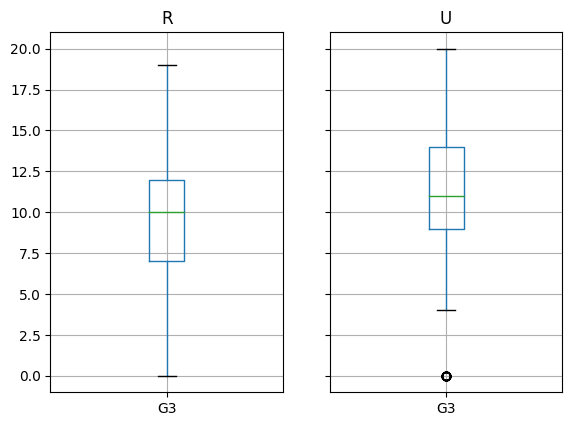

In [32]:
s = groups_by_address.boxplot(column=['G3'])


<h3>Найдем качественный показатель, который обладает большей разницей по частотам значений для групп по местностной принадлежности адреса ученика</h3>

In [33]:
groups_by_address = df[discrete_columns].groupby(by='address')
address_sizes = {'R': groups_by_address.size()['R'], 'U': groups_by_address.size()['U']}
discrete_values_counts = {}
for column_name in discrete_columns:
    if column_name!='address':
        discrete_values_counts[column_name] = {'R': {}, 'U': {}}
        data = groups_by_address[column_name].value_counts().to_dict()
        for key, value in data.items():
            discrete_values_counts[column_name][key[0]][key[1]] = value
print(discrete_values_counts)
for column_name, column_values in discrete_values_counts.items():
    for address_value, column_values_by_address in column_values.items():
        for column_value_name, column_value_count in column_values_by_address.items():
            column_values_by_address[column_value_name] = column_value_count/address_sizes[address_value]*100

max_difference = (0, '', '', '')
for column_name, column_values in discrete_values_counts.items():
    possible_column_values = column_values['R'].keys()
    for possible_column_value in possible_column_values:
        if abs(column_values['R'][possible_column_value] - column_values['U'][possible_column_value])>max_difference[0]:
            max_difference = (abs(column_values['R'][possible_column_value] - column_values['U'][possible_column_value]), 
                              column_name,
                              possible_column_value,
                              'R' if column_values['R'][possible_column_value]>column_values['U'][possible_column_value] else 'U')

display(Markdown(f'''<h3>Таким образом, наибольшая разница по частоте значений наблюдается у показателя {max_difference[1]}:
                 значение {max_difference[2]} составляет на {max_difference[0]}% больше в группе, где местностная приндлежность равна {max_difference[3]}</h3>'''))



{'school': {'R': {'GP': 63, 'MS': 25}, 'U': {'GP': 286, 'MS': 21}}, 'sex': {'R': {'F': 44, 'M': 44}, 'U': {'F': 164, 'M': 143}}, 'famsize': {'R': {'GT3': 68, 'LE3': 20}, 'U': {'GT3': 213, 'LE3': 94}}, 'Pstatus': {'R': {'T': 81, 'A': 7}, 'U': {'T': 273, 'A': 34}}, 'Medu': {'R': {2: 24, 3: 24, 1: 21, 4: 19}, 'U': {4: 112, 2: 79, 3: 75, 1: 38, 0: 3}}, 'Fedu': {'R': {2: 26, 1: 25, 4: 21, 3: 16}, 'U': {2: 89, 3: 84, 4: 75, 1: 57, 0: 2}}, 'Mjob': {'R': {'other': 34, 'at_home': 22, 'services': 18, 'teacher': 11, 'health': 3}, 'U': {'other': 107, 'services': 85, 'teacher': 47, 'at_home': 37, 'health': 31}}, 'Fjob': {'R': {'other': 53, 'services': 23, 'teacher': 6, 'at_home': 4, 'health': 2}, 'U': {'other': 164, 'services': 88, 'teacher': 23, 'at_home': 16, 'health': 16}}, 'reason': {'R': {'course': 36, 'reputation': 29, 'home': 13, 'other': 10}, 'U': {'course': 109, 'home': 96, 'reputation': 76, 'other': 26}}, 'guardian': {'R': {'mother': 67, 'father': 15, 'other': 6}, 'U': {'mother': 206, 'fa

<h3>Таким образом, наибольшая разница по частоте значений наблюдается у показателя traveltime:
                 значение 1 составляет на 32.539976310334616% больше в группе, где местностная приндлежность равна U</h3>

<h3>К слову, довольно тривиальный вывод, так как показатель traveltime отражает время, за которое ученик добирается до школы, то есть школьников, которые проживают в городе и добираются в школу менее 15 минут значительно больше, чем школьников, которые живут в сельской местности и добираются до школы менее 15 минут.</h3>

<h3>5. Визуализация зависимостей показателей</h3>
<h3>В качестве пар показателей, между которыми мы будем выявлять зависимость было решено выбрать следующие:
<br>
Количественный-количественный: absences-G3(пропуски-оценка за экзамен по математике)</h3>

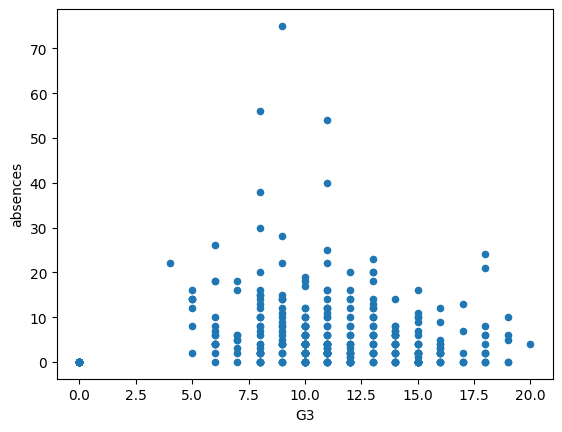

In [34]:
grade_absences_plot = df.plot(kind='scatter', x='G3', y='absences')

<h3>Количественный-качественный: G3-higher(оценка за тест по математике-желание ученика в дальнейшем получать высшее образование)</h3>

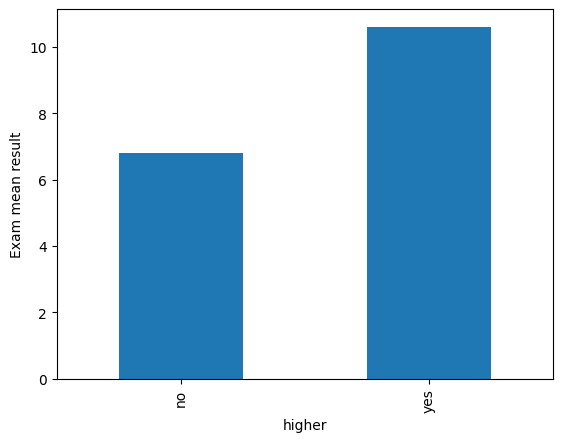

In [35]:
grade_higher_plot = df.groupby('higher')['G3'].mean().plot(kind='bar', x='higher', y='G3', ylabel='Exam mean result')

<h3>Качественный-качественный: PStatus-guardian(брачное состояние родителей(A-Apart, T-Together)-официальный опекун ребенка)</h3>

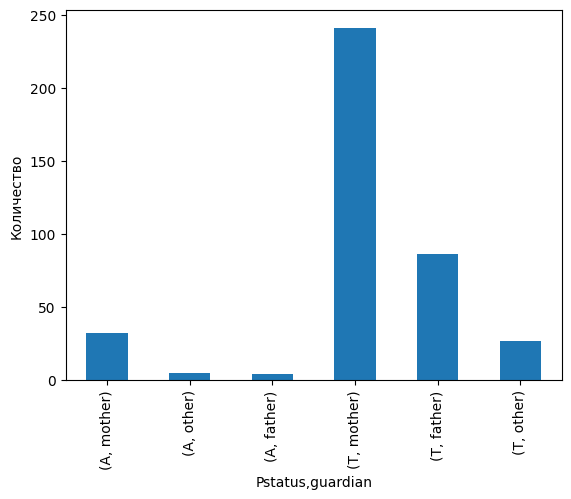

In [36]:
p_status_guardian_plot = df.groupby(['Pstatus'])['guardian'].value_counts().plot.bar(x='PStatus', y='guardian', ylabel='Количество')

<h3>6. Пропуски данных и аномальные выбросы</h3>
<h3>На самом деле аномальные выбросы могут быть только в столбцах G3 и absence, так как остальные показатели либо качественные, либо интервальные. Что касается столбцов G3 и absence, аномальные выбросы внутри них видно на графике зависимости между ними(пункт 5, график 1): можно наблюдать несколько точек с координатами (0, 0). По существу, если ученик набрал 0 баллов за экзамен высока вероятность, что он его просто не сдавал, и так как у нас довольно много данных, мы можем пожертвовать вышеупомянутыми в силу их сомнительности. Посчитаем количество учеников, у которых 0 баллов за экзамен.</h3>

In [37]:
zero_result_students = (df['G3']==0).sum()
display(Markdown(f'''<h3>Количество учеников, получивших 0 баллов за экзамен составило {zero_result_students}</h3>'''))


<h3>Количество учеников, получивших 0 баллов за экзамен составило 38</h3>

<h3>Так как среднее значение баллов за экзамен у нас примерно 10, то при условии, что все ученики, данные о которых присутствуют в нашем датасете, проходили экзамен, нам стоит ожидать примерно схожего или хоть сколь-нибудь сравнимого количества учеников, написавших экзамен на максимальный результат(мы даже дадим данным поблажку и возьмем не максимальный результат, а результат не меньше 19 баллов).</h3>

In [38]:
max_result_students = (df['G3']>=19).sum()
display(Markdown(f'''<h3>Количество учеников, получивших не менее 19 баллов за экзамен составило {max_result_students}</h3>'''))

<h3>Количество учеников, получивших не менее 19 баллов за экзамен составило 6</h3>

<h3>Итак, наша гипотеза подтвердилась и мы действительно можем абсолютно легитимно избавиться от данных об учениках, которые набрали 0 баллов. Для того, чтобы окончательно удостовериться в том, что нулевые результаты экзамена означают неявку, проанализируем какое значение является минимальным результатом теста, кроме 0. </h3>

In [39]:
df_cleared = df[df['G3'] > 0]
min_without_zero_values = df_cleared['G3'].min()
print(min_without_zero_values)

4


<h3>То есть у нас есть 38 результатов со значением ноль и следующий за ними по возрастанию результат - 4. Очевидно, что если бы все нули были результатами учеников, которые действительно проходили тест, то между первыми двумя результатами при упорядочивании по возрастанию не было бы разницы в стандартное отклонение. Ввиду вышеприведенных аргументов считаю обоснованным обозначение нулевых результатов нелигитимными и исключение их из выборки. Ниже будет приведено описание неочищенных и очищенных от нулевых результатов теста.</h3>

In [40]:
print(df['G3'].describe())
df_cleared['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

<h3>К моему глубочайшему сожалению пропусков в данных нет, потому что я сначала сделал 5 пунктов, а потом прочитал шестой. Таким образом, в предыдущих пунктах работа осуществлялась с очищенными данными, что я считаю никак не влияет на результат выполнения задания, так как прежде чем выполнять любое из заданий пунктов 1-5 данные должны быть очищены. В качестве решения данной проблемы предлагаю создать в некоторых данных пропуски и затем устранить их.
Семантически под отсутствие некоторых значений подходят колонка, отражающая результат экзамена по математике(неявка), а также колонки, которые содержат информацию из опроса(по типу famrel, freetime, romantic, goout и т.д.).
Предлагаю заполнить неизвестными значениями колонки G3 и romantic, так как они семантически наиболее подходящие(многие ученики школы могут не хотеть раскрывать, состоят ли они в романтичеких отношениях🥺🥺🥺).
Заполнять незаданными значениями будем случайным образом: генерируем случайное число 0..1, если результат <=N, то изменяем значение на N/A.Для колонки romantic значение N будет 0.1, а для колонки G3 - 0.03</h3>

In [41]:
for index, row in df_cleared.iterrows():
    rand_val_romantic = random.random()
    if rand_val_romantic<=0.1:
        df_cleared.loc[index, 'romantic'] = pd.NA
    
    rand_val_g3 = random.random()
    if rand_val_g3<=0.03:
        df_cleared.loc[index, 'G3'] = pd.NA

<h3>Теперь посчитаем количество пропусков для каждого столбца таблицы</h3>

In [42]:
for column_name in df_cleared.columns:
    na_count = df_cleared[column_name].isna().sum()
    na_percentage = na_count/(len(df_cleared.index))
    display(Markdown(f'<p>{column_name}: {na_count}=={na_percentage}%</p>'))

<p>school: 0==0.0%</p>

<p>sex: 0==0.0%</p>

<p>age: 0==0.0%</p>

<p>address: 0==0.0%</p>

<p>famsize: 0==0.0%</p>

<p>Pstatus: 0==0.0%</p>

<p>Medu: 0==0.0%</p>

<p>Fedu: 0==0.0%</p>

<p>Mjob: 0==0.0%</p>

<p>Fjob: 0==0.0%</p>

<p>reason: 0==0.0%</p>

<p>guardian: 0==0.0%</p>

<p>traveltime: 0==0.0%</p>

<p>studytime: 0==0.0%</p>

<p>failures: 0==0.0%</p>

<p>schoolsup: 0==0.0%</p>

<p>famsup: 0==0.0%</p>

<p>paid: 0==0.0%</p>

<p>activities: 0==0.0%</p>

<p>nursery: 0==0.0%</p>

<p>higher: 0==0.0%</p>

<p>internet: 0==0.0%</p>

<p>romantic: 28==0.0784313725490196%</p>

<p>famrel: 0==0.0%</p>

<p>freetime: 0==0.0%</p>

<p>goout: 0==0.0%</p>

<p>Dalc: 0==0.0%</p>

<p>Walc: 0==0.0%</p>

<p>health: 0==0.0%</p>

<p>absences: 0==0.0%</p>

<p>G3: 8==0.022408963585434174%</p>

<h3>Чтобы устранить пропуски из таблицы мы используем два подхода к пропускам в двух колонках. Строки с пропусками в столбце с результатами экзамена по математике считаю обоснованным удалить, так как по сути мы не имеем данных, с помощью которых мы можем установить ккакие либо закономерности или законы.
Что же касается строк с пропусками в столбце romatic, чтобы использовать наиболее корректную тактику устранения пропусков, мы рассмотрим распределение значений в этом стобце. </h3>

In [43]:
df_cleared_from_na = df_cleared[df_cleared['G3']!=pd.NA]
display(Markdown('<p>Описание столбца G3 после удаления строк, в которых значение этого столбца не задано</p>'))
df_cleared_from_na['G3'].describe()

<p>Описание столбца G3 после удаления строк, в которых значение этого столбца не задано</p>

count    349.000000
mean      11.515759
std        3.219536
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [44]:
df_cleared_from_na['romantic'].value_counts(dropna=False)

romantic
no      223
yes     106
<NA>     28
Name: count, dtype: int64

<h3>Мы убедились, что подавляющее большинство учеников не имеют романтических отношений, поэтому адекватной мерой было бы заполнить ячейки в которых нет значения значением 'no', но у нас в таблице есть столбец age, который показывает возраст ученика и интуитивно напрашивается связь между возрастом и наличием романтических отношений. То есть мы можем устранять пропуски не просто меняя N/A на "no", но делать это в зависимости от доминирующего значения в возврастной группе ученика. Сгруппируем значения датасета по возрасту и посмотрим на доминирующий статус романтических отношений внутри групп.</h3>

In [45]:
romantic_by_age = df_cleared_from_na[['age', 'romantic']].groupby('age')


In [46]:
for index, row in romantic_by_age.describe().iterrows():
    print(f'''Возраст {index}: доминирующее значение {row.romantic['top']} составляет {(row.romantic['freq']/row.romantic['count'])*100}% из {row.romantic['count']}''')

Возраст 15: доминирующее значение no составляет 81.15942028985508% из 69
Возраст 16: доминирующее значение no составляет 72.41379310344827% из 87
Возраст 17: доминирующее значение no составляет 65.51724137931035% из 87
Возраст 18: доминирующее значение no составляет 56.25% из 64
Возраст 19: доминирующее значение yes составляет 52.94117647058824% из 17
Возраст 20: доминирующее значение no составляет 66.66666666666666% из 3
Возраст 21: доминирующее значение no составляет 100.0% из 1
Возраст 22: доминирующее значение yes составляет 100.0% из 1


<h3>Как мы видим, у нормальных людей(которые не учатся в школе в 19 и больше лет), действительно присутствует тенденция к увеличению доли состоящих в отношениях(~10% в год). И хотя практически у всех групп учеников все равно доминирующее значение 'no', имеет смысл заменять N/A в столбце romantic именно на доминирующее значение в возрастной группе, нежели на просто 0, так как у группы 18-летних лишь 53% не состоят в отношениях, то есть при дополнениии данного датасета новыми учениками вполне может сложиться ситуация, когда у 18-летних учеников большинство будет в отношениях(под дополнением датасета я имею в виду проведение такого же исследования с такими же столбцами, но большим колическтвом респондентов). </h3>

In [47]:
for index, row in df_cleared_from_na.iterrows():
    if pd.isna(row['romantic']):
        #print(romantic_by_age.describe().loc[row['age'].top])
        df_cleared_from_na.loc[index, 'romantic'] = romantic_by_age.describe().loc[row['age']].romantic.top

In [48]:
df_cleared_from_na.romantic.value_counts(dropna=False)

romantic
no     249
yes    108
Name: count, dtype: int64